In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import style
style.use('default')
from mpl_toolkits.mplot3d import Axes3D

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
?KMeans

In [84]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [13]:
km = KMeans(3)

In [30]:
y = km.fit_predict(X)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [33]:
sum(Y == y)/len(y)

0.8933333333333333

In [34]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [52]:
acc = sum(Y == y)/len(Y)

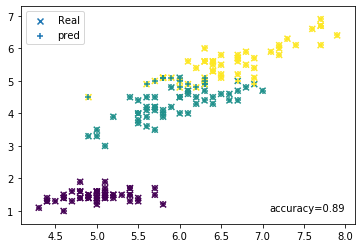

In [55]:
plt.scatter(X[:,0], X[:,2], c=Y, marker = 'x', label = 'Real')
plt.scatter(X[:,0], X[:,2], c=y, marker = '+', label = 'pred')
plt.text(8.,1.,'accuracy=%.2f'% acc, horizontalalignment= 'right')
plt.legend()

In [69]:
df = pd.read_csv('./titanic/train.csv', index_col = 0)
df2 = pd.get_dummies(df.Sex, prefix='Sex')
df2['Pclass'] = df.Pclass
df2['SibSp'] = df.SibSp
df2['Parch'] = df.Parch
df2 = pd.concat([df2, pd.get_dummies(df.Embarked,prefix='Embarked')], axis=1)

title = pd.Series([x.split(', ')[1].split('.')[0] for x in df.Name], index=df.index)
temp = title.value_counts()
tgt = temp[temp < 3].index.values

title[[x in tgt for x in title]] = 'Etc'
df2 = pd.concat([df2, pd.get_dummies(title, prefix='Embarked')], axis=1)

In [70]:
X = df2.values
Y = df.Survived.values

In [72]:
km = KMeans(2)

km.fit(X)
y = km.labels_

In [73]:
from sklearn.manifold import TSNE
tsne = TSNE(2)

In [74]:
x = tsne.fit_transform(X)

In [75]:
a, b = zip(*x)

In [78]:
acc = sum(Y==y)/len(Y)

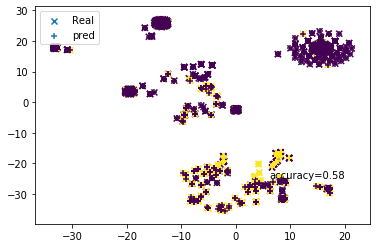

In [80]:
plt.scatter(a,b,c=Y, marker = 'x', label = 'Real')
plt.scatter(a,b,c=y, marker = '+', label = 'pred')
plt.text(20.,-25.,'accuracy=%.2f'% acc, horizontalalignment= 'right')
plt.legend()

In [85]:
err = []
for k in range(2, 10):
    km = KMeans(k)
    km.fit(X)
    err.append(km.inertia_)

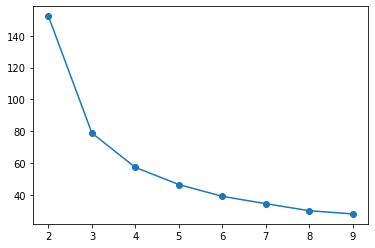

In [88]:
plt.plot(np.arange(2,10), err, '-o')